<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/jennlee/customer_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
rfm = pd.read_csv('/content/drive/MyDrive/co_note/project/data/cust_seg_rfm.csv')
rfm.drop(columns = {'age_join'}, inplace=True)

sales = pd.read_csv('/content/drive/MyDrive/co_note/project/data/sales.csv')

product = pd.read_csv('/content/drive/MyDrive/co_note/project/data/product_final.csv')
product.rename(columns={'id': 'product_id'}, inplace=True)

customer = pd.read_csv('/content/drive/MyDrive/co_note/project/data/customer_final.csv')

transaction = pd.read_csv('/content/drive/MyDrive/co_note/project/data/transaction_final.csv')

In [ ]:
transaction[transaction.customer_id == 85067]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo


In [ ]:
rfm['customer_id'].isin(sales['customer_id']).sum()

50704

In [ ]:
rfm[rfm['RFM_Segment'].isna()]

In [113]:
rfm.drop(columns = {'RFM_Segment_x'}, inplace=True)

In [114]:
rfm.rename(columns = {'RFM_Segment_y':'rfm_seg'}, inplace=True)

In [115]:
rfm.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_now,age_segment,join_year,join_month,rfm_seg
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,26,Late 20s(26-30),2019,7,NaN
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,29,Late 20s(26-30),2017,7,NaN
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,33,Early 30s(31-35),2020,8,322.0
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,31,Early 30s(31-35),2021,10,NaN
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,22,Early 20s(21-25),2021,4,111.0


In [ ]:
rfm['rfm_seg'].isnull().sum()

49300

In [ ]:
sales.head()

,customer_id,booking_id,created_at,total_amount,promo_amount,shipment_fee,sales,gender,age_now,first_join_date
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,174717,3791,0,170926,M,36,2018-08-25
1,3,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,2022-06-26 15:41:52.844494+00:00,189939,4240,0,185699,M,36,2018-08-25
2,3,1229bd35-7747-447a-a60b-02860bf7da7e,2021-07-25 10:24:57.844494+00:00,287523,0,0,287523,M,36,2018-08-25
3,3,163e447d-f2c2-4fac-b8a1-015eb01afd41,2020-06-28 06:31:43.844494+00:00,359032,1472,0,357560,M,36,2018-08-25
4,3,182774df-3cde-46cf-b302-4d93e0d94288,2021-01-10 07:56:16.844494+00:00,205436,4746,5000,195690,M,36,2018-08-25


In [ ]:
print(rfm.shape, sales.shape)

(99999, 10) (852582, 10)


# sales & rfm

In [ ]:
rfm[rfm['rfm_seg'].notnull()].shape

(50699, 10)

In [ ]:
filt_rfm.shape

(50704, 10)

In [125]:
filt_rfm = rfm[rfm['customer_id'].isin(sales['customer_id'])]
filt_rfm[filt_rfm['rfm_seg'].isna()]

,customer_id,gender,birthdate,home_location,first_join_date,age_now,age_segment,join_year,join_month,rfm_seg
2439,87679,M,2000-10-28,Jawa Timur,2017-01-24,22,Early 20s(21-25),2017,1,NaN
41935,85067,F,2000-07-30,Jakarta Raya,2021-03-31,22,Early 20s(21-25),2021,3,NaN
46004,73004,F,1989-09-13,Jawa Timur,2017-02-27,33,Early 30s(31-35),2017,2,NaN
60767,95982,F,1998-05-17,Kalimantan Barat,2018-01-06,24,Early 20s(21-25),2018,1,NaN
74601,42623,M,2007-08-31,Jawa Barat,2022-03-05,15,minor(15-20),2022,3,NaN


In [ ]:
transaction[transaction.customer_id == 42623]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
705412,2022-03-06 13:43:33.346828+00:00,42623,1091512a-b2a0-489b-af6e-22fe7ace92a4,7b8365cf-8129-4ffa-afa4-689ef6514038,OVO,1,7103,3.0,10000,211187,23110,1,208290,1


In [ ]:
rfm[rfm['rfm_seg'].notnull()].shape
rfm.customer_id.nunique()

99999

In [127]:
# customer_id 기준 merge 한 후 RFM_Segment NAN은 제외
rfm_sales = sales.merge(rfm, on='customer_id', how='left')
display(rfm_sales.head(), rfm_sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852582 entries, 0 to 852581
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        852582 non-null  int64  
 1   booking_id         852582 non-null  object 
 2   created_at         852582 non-null  object 
 3   total_amount       852582 non-null  int64  
 4   promo_amount       852582 non-null  int64  
 5   shipment_fee       852582 non-null  int64  
 6   sales              852582 non-null  int64  
 7   gender_x           852582 non-null  object 
 8   age_now_x          852582 non-null  int64  
 9   first_join_date_x  852582 non-null  object 
 10  gender_y           852582 non-null  object 
 11  birthdate          852582 non-null  object 
 12  home_location      852582 non-null  object 
 13  first_join_date_y  852582 non-null  object 
 14  age_now_y          852582 non-null  int64  
 15  age_segment        852582 non-null  object 
 16  jo

,customer_id,booking_id,created_at,total_amount,promo_amount,shipment_fee,sales,gender_x,age_now_x,first_join_date_x,gender_y,birthdate,home_location,first_join_date_y,age_now_y,age_segment,join_year,join_month,rfm_seg
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,174717,3791,0,170926,M,36,2018-08-25,M,1986-07-12,Jakarta Raya,2018-08-25,36,non-target adults(36-),2018,8,322.0
1,3,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,2022-06-26 15:41:52.844494+00:00,189939,4240,0,185699,M,36,2018-08-25,M,1986-07-12,Jakarta Raya,2018-08-25,36,non-target adults(36-),2018,8,322.0
2,3,1229bd35-7747-447a-a60b-02860bf7da7e,2021-07-25 10:24:57.844494+00:00,287523,0,0,287523,M,36,2018-08-25,M,1986-07-12,Jakarta Raya,2018-08-25,36,non-target adults(36-),2018,8,322.0
3,3,163e447d-f2c2-4fac-b8a1-015eb01afd41,2020-06-28 06:31:43.844494+00:00,359032,1472,0,357560,M,36,2018-08-25,M,1986-07-12,Jakarta Raya,2018-08-25,36,non-target adults(36-),2018,8,322.0
4,3,182774df-3cde-46cf-b302-4d93e0d94288,2021-01-10 07:56:16.844494+00:00,205436,4746,5000,195690,M,36,2018-08-25,M,1986-07-12,Jakarta Raya,2018-08-25,36,non-target adults(36-),2018,8,322.0


None

In [128]:
rfm_sales['rfm_seg'].value_counts()

322.0    600286
222.0    162894
111.0     27871
211.0     22313
221.0     12352
311.0      8497
321.0      6567
122.0      4687
112.0      2806
212.0      2702
312.0      1048
121.0       554
Name: rfm_seg, dtype: int64

In [118]:
rfm_sales['age_segment'].unique()

array(['non-target adults(36-)', 'Early 20s(21-25)', 'minor(15-20)',
       'Late 20s(26-30)', 'non-target minor(0-14)', 'Early 30s(31-35)'],
      dtype=object)

In [133]:
rfm_sales.drop(columns={'gender_y','first_join_date_y','age_now_y'}, inplace=True)

In [134]:
rfm_sales['created_at'] = pd.to_datetime(rfm_sales['created_at']).dt.to_period('M')
rfm_sales = rfm_sales[rfm_sales['created_at'] >= '2020-08']
rfm_sales.sort_values('created_at', inplace=True)

TypeError: ignored

In [130]:
rfm_sales.head()

,customer_id,booking_id,created_at,total_amount,promo_amount,shipment_fee,sales,gender_x,age_now_x,first_join_date_x,gender_y,birthdate,home_location,first_join_date_y,age_now_y,age_segment,join_year,join_month,rfm_seg
552569,64648,c6887027-0616-4045-86b4-9facd7de6f98,2020-08,208987,0,10000,198987,M,31,2020-03-15,M,1991-03-20,Yogyakarta,2020-03-15,31,Early 30s(31-35),2020,3,322.0
77977,9074,a459d2d2-5aba-47ff-94ff-dea693158f7b,2020-08,185855,6795,10000,169060,F,26,2019-01-27,F,1996-11-24,Lampung,2019-01-27,26,Late 20s(26-30),2019,1,322.0
322991,37323,962292c4-caf1-4f78-ac29-5bba1bdd7289,2020-08,1025553,0,0,1025553,F,23,2020-07-12,F,1999-01-14,Jakarta Raya,2020-07-12,23,Early 20s(21-25),2020,7,322.0
17886,2056,9387a698-fc3e-4b52-914a-34b68ae27b48,2020-08,530751,625,0,530126,F,32,2018-01-11,F,1990-04-03,Jawa Barat,2018-01-11,32,Early 30s(31-35),2018,1,122.0
558942,65262,28be26ca-9a5e-43b7-91dc-64a3661f25be,2020-08,628784,0,10000,618784,F,22,2018-08-04,F,2000-04-12,Jakarta Raya,2018-08-04,22,Early 20s(21-25),2018,8,222.0


In [ ]:
rfm_sales[rfm_sales['rfm_seg'].isna()]

,customer_id,booking_id,created_at,total_amount,promo_amount,shipment_fee,sales,gender_x,age_now_x,first_join_date_x,birthdate,home_location,join_year,join_month,age_segment,rfm_seg
723850,85067,78277d57-a555-4c53-8d55-bf6a4a27e827,2021-03,167544,0,10000,157544,F,22,2021-03-31,2000-07-30,Jakarta Raya,2021,3,Early 20s(21-25),NaN
366309,42623,1091512a-b2a0-489b-af6e-22fe7ace92a4,2022-03,211187,7103,10000,194084,M,15,2022-03-05,2007-08-31,Jawa Barat,2022,3,minor(15-20),NaN


In [ ]:
rfm_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532377 entries, 552569 to 517172
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype    
---  ------             --------------   -----    
 0   customer_id        532377 non-null  int64    
 1   booking_id         532377 non-null  object   
 2   created_at         532377 non-null  period[M]
 3   total_amount       532377 non-null  int64    
 4   promo_amount       532377 non-null  int64    
 5   shipment_fee       532377 non-null  int64    
 6   sales              532377 non-null  int64    
 7   gender_x           532377 non-null  object   
 8   age_now_x          532377 non-null  int64    
 9   first_join_date_x  532377 non-null  object   
 10  birthdate          532377 non-null  object   
 11  home_location      532377 non-null  object   
 12  join_year          532377 non-null  int64    
 13  join_month         532377 non-null  int64    
 14  age_segment        532377 non-null  object   
 15  rfm_seg     

In [131]:
rfm_sales_dist[(rfm_sales_dist['customer_id'] == 85067) | (rfm_sales_dist['customer_id'] == 42623)]

,customer_id,booking_id,created_at,sales,age_now_x,age_segment,rfm_seg
723850,85067,78277d57-a555-4c53-8d55-bf6a4a27e827,2021-03,157544,22,Early 20s(21-25),NaN
366309,42623,1091512a-b2a0-489b-af6e-22fe7ace92a4,2022-03,194084,15,minor(15-20),NaN


In [132]:
rfm_sales_dist = rfm_sales[['customer_id','booking_id','created_at', 'sales', 'age_now_x', 'age_segment','rfm_seg']]
rfm_sales_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532377 entries, 552569 to 517172
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype    
---  ------       --------------   -----    
 0   customer_id  532377 non-null  int64    
 1   booking_id   532377 non-null  object   
 2   created_at   532377 non-null  period[M]
 3   sales        532377 non-null  int64    
 4   age_now_x    532377 non-null  int64    
 5   age_segment  532377 non-null  object   
 6   rfm_seg      532375 non-null  float64  
dtypes: float64(1), int64(3), object(2), period[M](1)
memory usage: 32.5+ MB


## 고객군별 월별 매출

In [135]:
pd.set_option('display.max_rows', None)
grouped_data = rfm_sales_dist.groupby(['created_at', 'rfm_seg'])['sales'].sum().reset_index()
grouped_data

,created_at,rfm_seg,sales
0,2020-08,111.0,299241664
1,2020-08,112.0,82403877
2,2020-08,121.0,5428043
3,2020-08,122.0,147429624
4,2020-08,211.0,114156616
5,2020-08,212.0,54052129
6,2020-08,221.0,91065929
7,2020-08,222.0,1914357176
8,2020-08,321.0,609935
9,2020-08,322.0,5801413733


2022-05, 2022-06은 3그룹(211, 221, 212)이, 2022-07은 4그룹(211, 221, 212, 222)이 없음 (최근 구매 고객이 없음?)

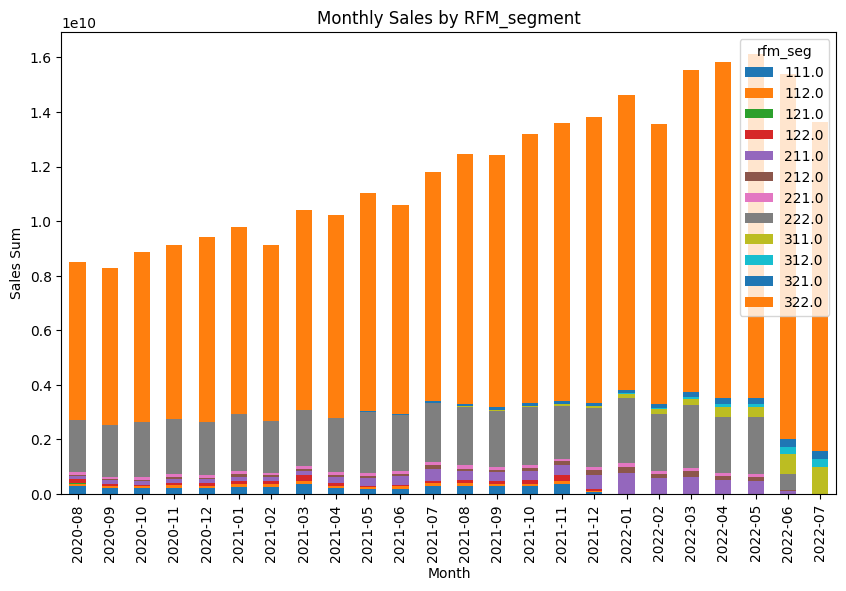

In [136]:
# Group the data by 'created_at' and 'rfm_segment' and calculate the sum of 'sales'
grouped_data = rfm_sales_dist.groupby(['created_at', 'rfm_seg'])['sales'].sum().reset_index()

# Pivot the data to reshape it for plotting
pivot_data = grouped_data.pivot(index='created_at', columns='rfm_seg', values='sales')

# Plot the bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Sales Sum')
plt.title('Monthly Sales by RFM_segment')

# Show the plot
plt.show()

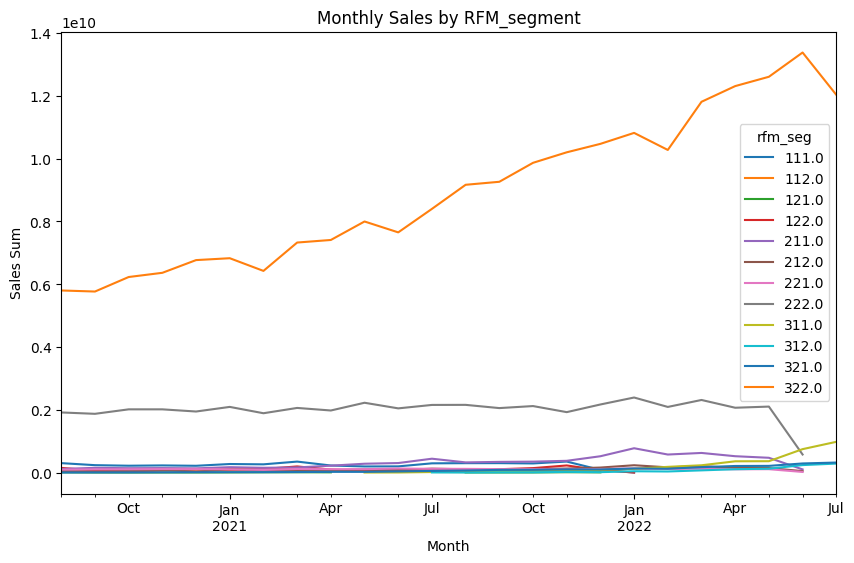

In [138]:
# 그룹별 표 & 라인 그래프
# Group the data by 'created_at' and 'rfm_segment' and calculate the sum of 'sales'
grouped_data = rfm_sales_dist.groupby(['created_at', 'rfm_seg'])['sales'].sum().reset_index()

# Pivot the data to reshape it for plotting
pivot_data = grouped_data.pivot(index='created_at', columns='rfm_seg', values='sales')

# Plot the line graph
pivot_data.plot(kind='line', figsize=(10, 6))

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Sales Sum')
plt.title('Monthly Sales by RFM_segment')

# Show the plot
plt.show()


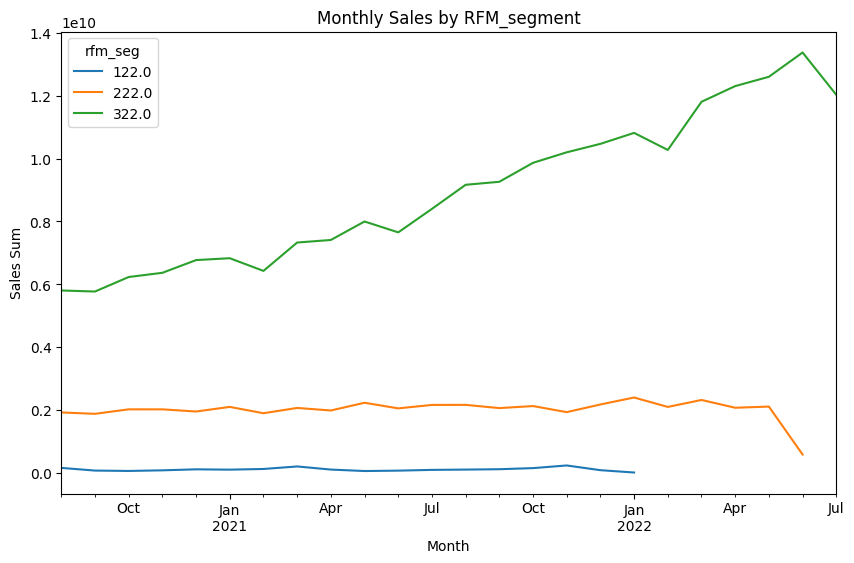

In [142]:
# Group the data by 'created_at' and 'rfm_segment' and calculate the sum of 'sales'
grouped_data = rfm_sales_dist.groupby(['created_at', 'rfm_seg'])['sales'].sum().reset_index()

# Filter the data for the desired RFM segments
desired_segments = [322, 222, 122]
filtered_data = grouped_data[grouped_data['rfm_seg'].isin(desired_segments)]

# Pivot the filtered data to reshape it for plotting
pivot_data = filtered_data.pivot(index='created_at', columns='rfm_seg', values='sales')

# Plot the line graph for the desired RFM segments
pivot_data.plot(kind='line', figsize=(10, 6))

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Sales Sum')
plt.title('Monthly Sales by RFM_segment')

# Show the plot
plt.show()


In [ ]:
# 구매횟수랑 flow 비슷

In [140]:
# Group the data by 'created_at' and 'rfm_segment' and calculate the sum of 'sales'
grouped_data = rfm_sales_dist.groupby(['created_at', 'rfm_seg'])['sales'].sum().reset_index()

# Create a pivot table to reshape the data
pivot_table = pd.pivot_table(grouped_data, values='sales', index='created_at', columns='rfm_seg', aggfunc='sum')

# Display the pivot table
pivot_table.head()

rfm_seg,111.0,112.0,121.0,122.0,211.0,212.0,221.0,222.0,311.0,312.0,321.0,322.0
created_at,,,,,,,,,,,,
2020-08,299241664.0,82403877.0,5428043.0,147429624.0,114156616.0,54052129.0,91065929.0,1.914357e+09,NaN,NaN,609935.0,5.801414e+09
2020-09,234746659.0,61120147.0,923949.0,62333018.0,148849475.0,29821252.0,102031211.0,1.870785e+09,NaN,NaN,2516791.0,5.767456e+09
2020-10,217036434.0,71837688.0,318521.0,50336325.0,137830105.0,46764981.0,103299768.0,2.013481e+09,NaN,NaN,2772893.0,6.230124e+09
2020-11,226442114.0,109291595.0,1746383.0,70081085.0,141150892.0,82153879.0,109649214.0,2.013341e+09,NaN,NaN,6297106.0,6.364157e+09
2020-12,214889609.0,92092521.0,1018996.0,101952764.0,133022138.0,27054955.0,108399880.0,1.944138e+09,NaN,NaN,9076011.0,6.769146e+09


2022-05~07에서 322 & 222의 매출이 떨어지고 있다. <br/>
구매횟수랑 flow 비슷

## 222 (OLD LOYAL) 고객군에 대한 분석

In [143]:
rfm.rfm_seg.value_counts()

111.0    14604
322.0    13746
222.0     8463
211.0     6464
311.0     2297
221.0     1258
112.0     1146
122.0     1040
212.0      705
321.0      652
312.0      249
121.0       75
Name: rfm_seg, dtype: int64

In [146]:
r2_loyal = rfm[rfm['rfm_seg'] == 222]
r2_loyal.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_now,age_segment,join_year,join_month,rfm_seg
17,97883,F,1999-08-24,Jakarta Raya,2017-07-30,23,Early 20s(21-25),2017,7,222.0
19,31163,F,2003-04-11,Lampung,2020-03-08,19,minor(15-20),2020,3,222.0
24,6487,F,2000-08-22,Maluku,2021-02-14,22,Early 20s(21-25),2021,2,222.0
46,96759,F,2000-05-05,Lampung,2017-08-13,22,Early 20s(21-25),2017,8,222.0
61,39488,F,1998-02-09,Kalimantan Barat,2020-11-08,24,Early 20s(21-25),2020,11,222.0


In [147]:
r3_loyal = rfm[rfm['rfm_seg'] == 322]
r3_loyal.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_now,age_segment,join_year,join_month,rfm_seg
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,33,Early 30s(31-35),2020,8,322.0
14,94370,F,1998-06-28,Jawa Timur,2018-02-24,24,Early 20s(21-25),2018,2,322.0
16,72106,F,2001-02-23,Jakarta Raya,2021-05-01,21,Early 20s(21-25),2021,5,322.0
32,43159,F,2000-11-01,Kalimantan Selatan,2016-08-27,22,Early 20s(21-25),2016,8,322.0
38,74709,M,1993-07-30,Kalimantan Tengah,2018-11-17,29,Late 20s(26-30),2018,11,322.0


In [148]:
r2_loyal.shape

(8463, 10)

In [ ]:
transaction.customer_id.nunique()

50704

In [151]:
r2_loyal.customer_id.nunique()

8463

In [21]:
rfm_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532377 entries, 552569 to 517172
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype    
---  ------             --------------   -----    
 0   customer_id        532377 non-null  int64    
 1   booking_id         532377 non-null  object   
 2   created_at         532377 non-null  period[M]
 3   total_amount       532377 non-null  int64    
 4   promo_amount       532377 non-null  int64    
 5   shipment_fee       532377 non-null  int64    
 6   sales              532377 non-null  int64    
 7   gender_x           532377 non-null  object   
 8   age_now_x          532377 non-null  int64    
 9   first_join_date_x  532377 non-null  object   
 10  birthdate          532377 non-null  object   
 11  home_location      532377 non-null  object   
 12  join_year          532377 non-null  int64    
 13  join_month         532377 non-null  int64    
 14  age_segment        532377 non-null  object   
 15  rfm_seg     

In [152]:
# 122의 promo 사용 거래수(161211) / 122의 총 거래수(532377)
# r2_loyal = rfm[rfm['rfm_seg'] == 222]
len(rfm_sales[(rfm_sales.rfm_seg == 222) & (rfm_sales.promo_amount != 0)]) / len(rfm_sales[rfm_sales.rfm_seg == 222])

0.4143778848851146

In [153]:
# 222층의 promo 사용 거래수(161211) / 총 거래수(532377)
len(rfm_sales[(rfm_sales.rfm_seg == 322) & (rfm_sales.promo_amount != 0)]) / len(rfm_sales[rfm_sales.rfm_seg == 322])

0.34169775007670483

### 222 promotion 사용 비율

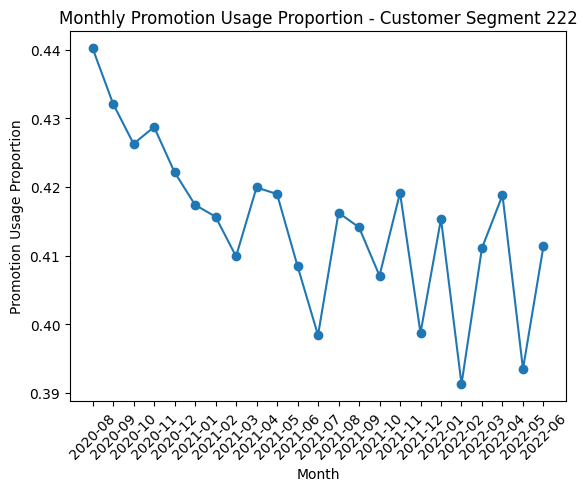

In [164]:
filtered_222 = rfm_sales[rfm_sales['rfm_seg'] == 222]

# Group the filtered data by 'created_at' and calculate promotion usage and total transaction count
grouped_222 = filtered_222.groupby('created_at').agg({'promo_amount': lambda x: (x != 0).sum(), 'customer_id': 'count'}).reset_index()

# Rename the columns
grouped_222.columns = ['Month', 'Promotion_Usage_Count', 'Total_Transaction_Count']

grouped_222['Promotion_Usage_Proportion'] = grouped_222['Promotion_Usage_Count'] / grouped_222['Total_Transaction_Count']

grouped_222['Month'] = grouped_222['Month'].astype(str)
plt.plot(grouped_222['Month'], grouped_222['Promotion_Usage_Proportion'], marker='o')

plt.xlabel('Month')
plt.ylabel('Promotion Usage Proportion')
plt.title('Monthly Promotion Usage Proportion - Customer Segment 222')

plt.xticks(rotation=45)

plt.show()

### 322 promotion 사용 비율

In [ ]:
filtered_322 = rfm_sales[rfm_sales['rfm_seg'] == 322]

# Group the filtered data by 'created_at' and calculate promotion usage and total transaction count
grouped_322 = filtered_322.groupby('created_at').agg({'promo_amount': lambda x: (x != 0).sum(), 'customer_id': 'count'}).reset_index()

# Rename the columns
grouped_322.columns = ['Month', 'Promotion_Usage_Count', 'Total_Transaction_Count']

# Calculate the promotion usage proportion
grouped_322['Promotion_Usage_Proportion'] = grouped_322['Promotion_Usage_Count'] / grouped_322['Total_Transaction_Count']

print(grouped_322)

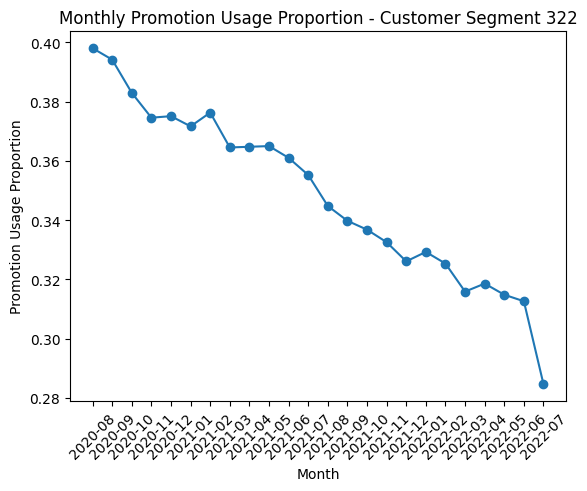

In [163]:
grouped_322['Month'] = grouped_322['Month'].astype(str)
plt.plot(grouped_322['Month'], grouped_322['Promotion_Usage_Proportion'], marker='o')

plt.xlabel('Month')
plt.ylabel('Promotion Usage Proportion')
plt.title('Monthly Promotion Usage Proportion - Customer Segment 322')

plt.xticks(rotation=45)

plt.show()

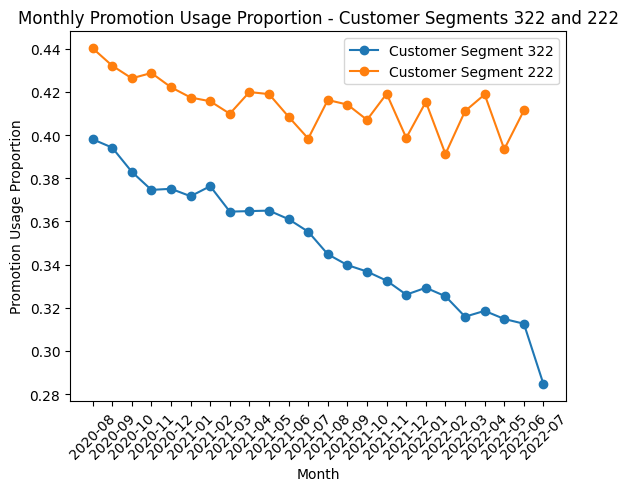

In [189]:
grouped_322['Month'] = grouped_322['Month'].astype(str)
grouped_222['Month'] = grouped_222['Month'].astype(str)

# Plot the line graph for customer segment 322
plt.plot(grouped_322['Month'], grouped_322['Promotion_Usage_Proportion'], marker='o', label='Customer Segment 322')

# Plot the line graph for customer segment 222
plt.plot(grouped_222['Month'], grouped_222['Promotion_Usage_Proportion'], marker='o', label='Customer Segment 222')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Promotion Usage Proportion')
plt.title('Monthly Promotion Usage Proportion - Customer Segments 322 and 222')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()

322 고객의 6-7월 promo 사용 결제 비율 크게 하락 <br>
222 고객의 promo 사용 결제 비율은 322와 비교했을 때 훨씬 높지만,

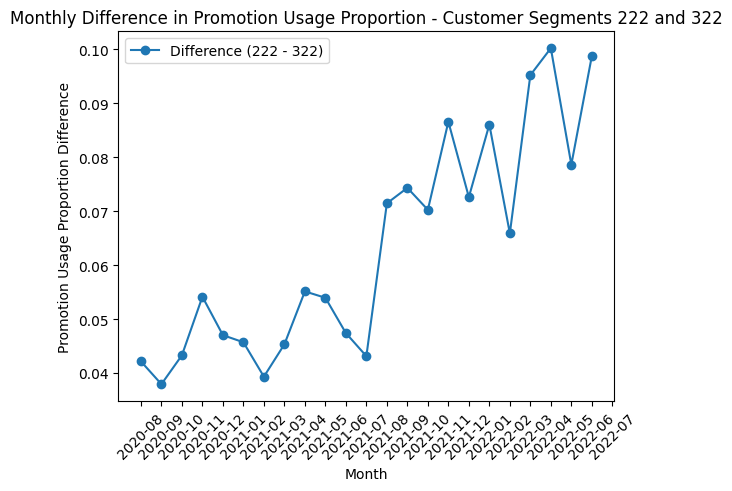

In [191]:
difference = grouped_222['Promotion_Usage_Proportion'] - grouped_322['Promotion_Usage_Proportion']

# Plot the line graph for the difference
plt.plot(grouped_322['Month'], difference, marker='o', label='Difference (222 - 322)')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Promotion Usage Proportion Difference')
plt.title('Monthly Difference in Promotion Usage Proportion - Customer Segments 222 and 322')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

plt.legend()

plt.show()

차이가 점점 벌어지다가 10퍼센트까지 차이가 남 -> 322 고객은 충성고객이기 때문에 딱히...

# transaction & rfm

### 222 product 선호

In [30]:
print(r2_loyal.shape, transaction.shape)

(19206, 10) (1254578, 14)


In [34]:
print(r2_loyal.info(), transaction.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19206 entries, 2 to 99998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      19206 non-null  int64  
 1   gender           19206 non-null  object 
 2   birthdate        19206 non-null  object 
 3   home_location    19206 non-null  object 
 4   first_join_date  19206 non-null  object 
 5   age_now          19206 non-null  int64  
 6   join_year        19206 non-null  int64  
 7   join_month       19206 non-null  int64  
 8   age_segment      19206 non-null  object 
 9   rfm_seg          19206 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254578 entries, 0 to 1254577
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   created_at      1254578 non-null  object 
 1   customer_id     12

In [166]:
# merge (transaction + customer)
t_cus = transaction.merge(customer, on='customer_id', how='left')
t_cus.shape

(1254578, 20)

In [167]:
t_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254578 entries, 0 to 1254577
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   created_at       1254578 non-null  object 
 1   customer_id      1254578 non-null  int64  
 2   booking_id       1254578 non-null  object 
 3   session_id       1254578 non-null  object 
 4   payment_method   1254578 non-null  object 
 5   payment_status   1254578 non-null  int64  
 6   promo_amount     1254578 non-null  int64  
 7   promo_code       1254578 non-null  float64
 8   shipment_fee     1254578 non-null  int64  
 9   total_amount     1254578 non-null  int64  
 10  product_id       1254578 non-null  int64  
 11  quantity         1254578 non-null  int64  
 12  item_price       1254578 non-null  int64  
 13  with_promo       1254578 non-null  int64  
 14  gender           1254578 non-null  object 
 15  birthdate        1254578 non-null  object 
 16  home_location    1

In [168]:
# merge (t_cus + rfm)
t_c_rfm = t_cus.merge(rfm[['customer_id', 'rfm_seg']], on='customer_id', how='left')

In [169]:
product.rename(columns={'gender':'prod_gender'}, inplace=True)

In [170]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          44424 non-null  int64 
 1   prod_gender         44424 non-null  object
 2   masterCategory      44424 non-null  object
 3   subCategory         44424 non-null  object
 4   articleType         44424 non-null  object
 5   baseColour          44409 non-null  object
 6   season              44403 non-null  object
 7   usage               44107 non-null  object
 8   productDisplayName  44417 non-null  object
 9   brand               44417 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.4+ MB


In [171]:
# merge (t_c_rfm + product)
merge = t_c_rfm.merge(product[['product_id','prod_gender', 'masterCategory', 'subCategory','articleType']], on='product_id', how='left')

In [172]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254578 entries, 0 to 1254577
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   created_at       1254578 non-null  object 
 1   customer_id      1254578 non-null  int64  
 2   booking_id       1254578 non-null  object 
 3   session_id       1254578 non-null  object 
 4   payment_method   1254578 non-null  object 
 5   payment_status   1254578 non-null  int64  
 6   promo_amount     1254578 non-null  int64  
 7   promo_code       1254578 non-null  float64
 8   shipment_fee     1254578 non-null  int64  
 9   total_amount     1254578 non-null  int64  
 10  product_id       1254578 non-null  int64  
 11  quantity         1254578 non-null  int64  
 12  item_price       1254578 non-null  int64  
 13  with_promo       1254578 non-null  int64  
 14  gender           1254578 non-null  object 
 15  birthdate        1254578 non-null  object 
 16  home_location    1

In [173]:
merge = merge[(merge['created_at'] >= '2020-08')]
merge.shape

(783226, 25)

#### 222 고객군 (Category)

In [178]:
# extract only 222 customer & after 2020-08
merge_222 = merge[(merge['rfm_seg']==222)]
merge_222.shape

(124188, 25)

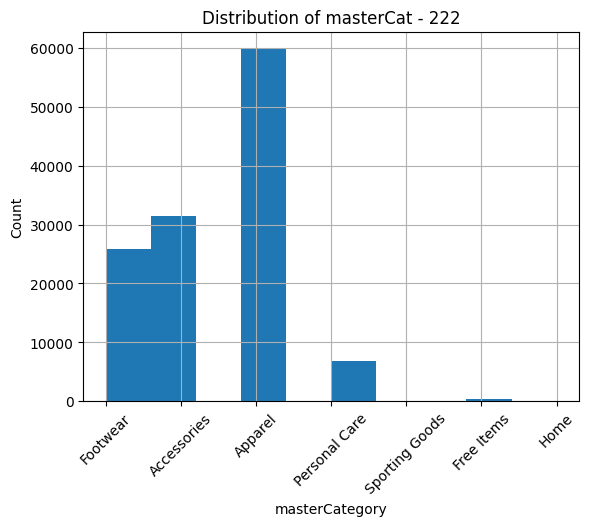

In [180]:
# masterCat dist
merge_222['masterCategory'].hist(bins=10)
plt.xlabel('masterCategory')
plt.ylabel('Count')
plt.title('Distribution of masterCat - 222')
plt.xticks(rotation=45)
plt.show()

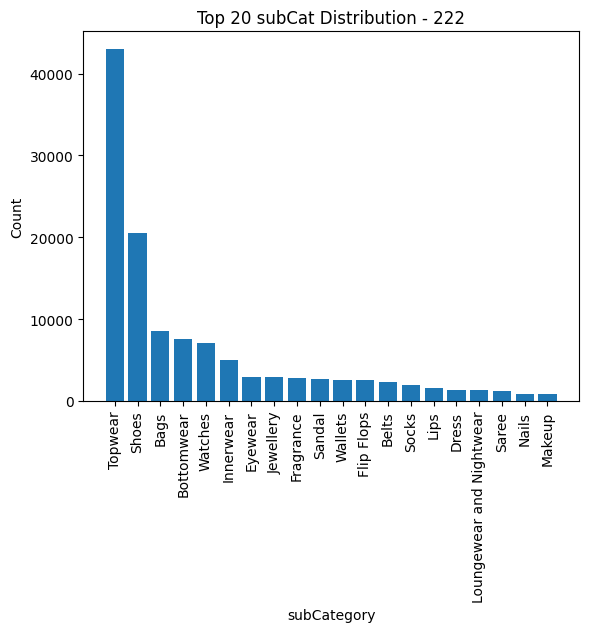

In [181]:
# subCat dist
top_20 = merge_222['subCategory'].value_counts().nlargest(20).sort_values(ascending=False)
plt.bar(top_20.index, top_20.values)
plt.xlabel('subCategory')
plt.ylabel('Count')
plt.title('Top 20 subCat Distribution - 222')
plt.xticks(rotation=90)
plt.show()

#### 322 고객군 (Category)

In [182]:
# extract only 322 customer & after 2020-08
merge_322 = merge[(merge['rfm_seg']==322)]
merge_322.shape

(585477, 25)

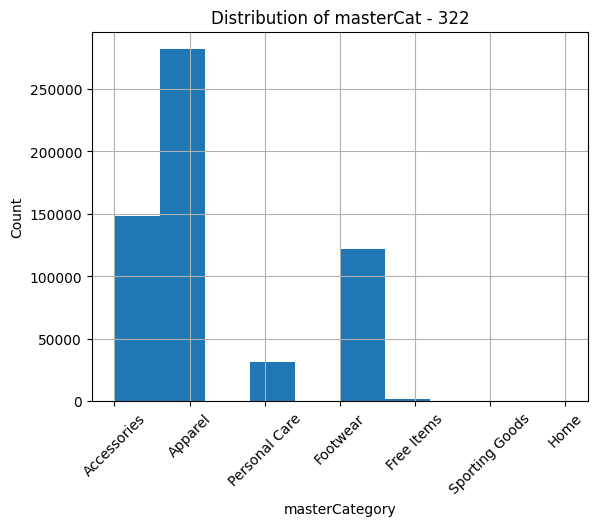

In [186]:
# masterCat dist
merge_322['masterCategory'].hist(bins=10)
plt.xlabel('masterCategory')
plt.ylabel('Count')
plt.title('Distribution of masterCat - 322')
plt.xticks(rotation=45)
plt.show()

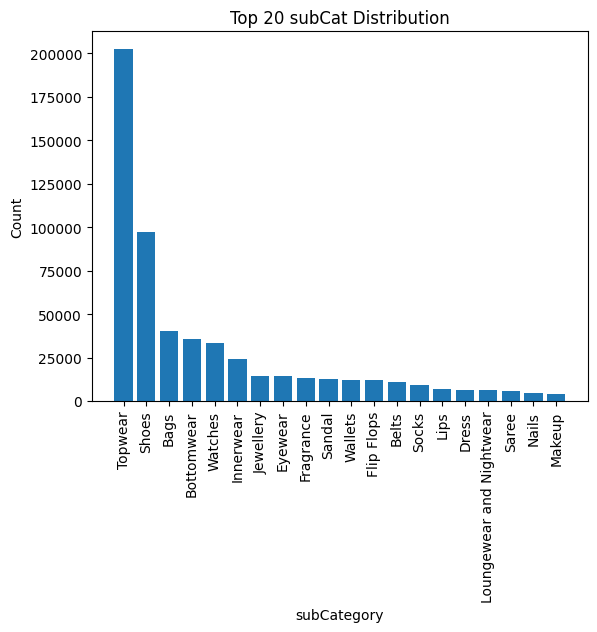

In [183]:
# subCat dist
top_20 = merge_322['subCategory'].value_counts().nlargest(20).sort_values(ascending=False)
plt.bar(top_20.index, top_20.values)
plt.xlabel('subCategory')
plt.ylabel('Count')
plt.title('Top 20 subCat Distribution')
plt.xticks(rotation=90)
plt.show()

222 preferred masterCat: apprael > footwear > accessories > personal care

222 preferred subCat: topwear > shoes > bags > watches > innerwear

322 preferred masterCat: apprael > accessories > footwear > personal care

222 preferred subCat: topwear > shoes > bags > > bottomwear > watches

### 222 demo

#### 222 vs 322 (home location)

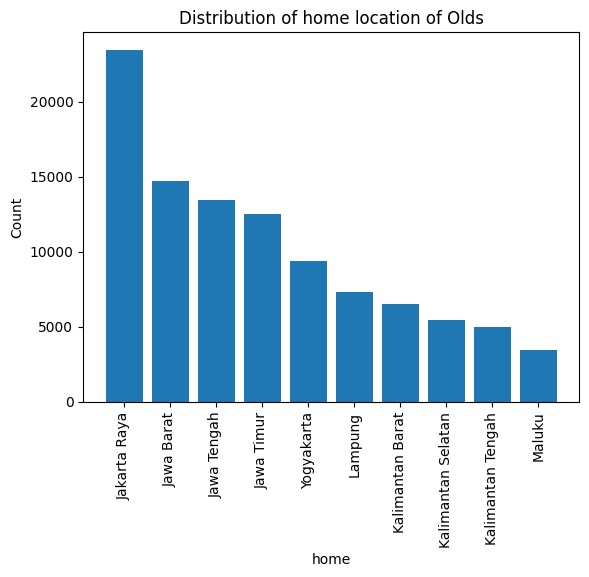

In [184]:
# home_location 기준 -> 지역자체에 차이가 난다면, 부유/가난 의 차이일 수도 있기때문
top_10 = merge_222['home_location'].value_counts().nlargest(10).sort_values(ascending=False)
plt.bar(top_10.index, top_10.values)
# merge_222['home_location'].hist(bins=10)
plt.xlabel('home')
plt.ylabel('Count')
plt.title('Distribution of home location of Olds')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.bar(top_20.index, top_20.values)

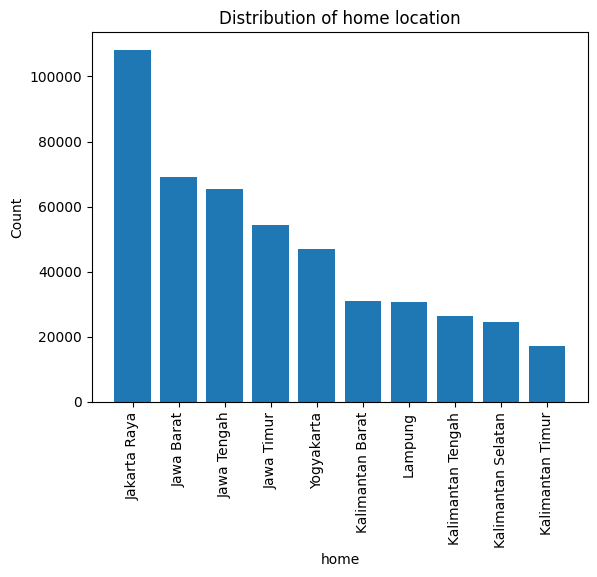

In [185]:
# home_location
top_10 = merge_322['home_location'].value_counts().nlargest(10).sort_values(ascending=False)
plt.bar(top_10.index, top_10.values)
# merge_old['home_location'].hist(bins=10)
plt.xlabel('home')
plt.ylabel('Count')
plt.title('Distribution of home location')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 차이1: kalimantan Barat, Lampung
# 차이2: maluku, kalimantan timur

In [192]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783226 entries, 27 to 1254575
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_at       783226 non-null  object 
 1   customer_id      783226 non-null  int64  
 2   booking_id       783226 non-null  object 
 3   session_id       783226 non-null  object 
 4   payment_method   783226 non-null  object 
 5   payment_status   783226 non-null  int64  
 6   promo_amount     783226 non-null  int64  
 7   promo_code       783226 non-null  float64
 8   shipment_fee     783226 non-null  int64  
 9   total_amount     783226 non-null  int64  
 10  product_id       783226 non-null  int64  
 11  quantity         783226 non-null  int64  
 12  item_price       783226 non-null  int64  
 13  with_promo       783226 non-null  int64  
 14  gender           783226 non-null  object 
 15  birthdate        783226 non-null  object 
 16  home_location    783226 non-null  ob